In [14]:
# Authors: N. Branson, M. Occhetta., A. Wenteler

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import mpl_sizes

formatter = mpl_sizes.get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis

In [5]:
# These results are produced by running `train.py` in conjunction with the corresponding scFM
df_mlp = pd.read_csv('aggregated_results/2-gene/mlp_baseline.csv')
df_scbert = pd.read_csv('aggregated_results/2-gene/scbert.csv')
df_scgpt = pd.read_csv('aggregated_results/2-gene/scgpt.csv')
df_gf = pd.read_csv('aggregated_results/2-gene/geneformer.csv')
df_uce = pd.read_csv('aggregated_results/2-gene/uce.csv')
df_mean = pd.read_csv('aggregated_results/2-gene/mean.csv')
df_scf = pd.read_csv('aggregated_results/2-gene/scfoundation.csv')

## Plotting and data processing functions

In [6]:
df_scf

,Name,Created,Runtime,Group,End Time,Hostname,Notes,Updated,Tags,ID,...,train/rmse,training_loss,val/avg_spearman,val/avg_spr_best,val/loss,val/pearson,val/pearson_best,val/prs,val/rmse,val/spearman
0,different-sea-1075,2024-09-29T15:41:09.000Z,81,mlp_norman_2_0.7,2024-09-29T15:42:30.000Z,xdg2,-,2024-09-29T15:42:30.000Z,"hpo, mlp, norman_2, replicate_1, scfoundation,...",3cyuiboh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,robust-dragon-1080,2024-09-29T16:47:27.000Z,102,mlp_norman_2_0.7,2024-09-29T16:49:09.000Z,rdg4,-,2024-09-29T16:49:09.000Z,"hpo, mlp, norman_2, replicate_2, scfoundation,...",9f0saxov,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole-bird-1052,2024-09-29T01:31:48.000Z,119,mlp_norman_2_0.7,2024-09-29T01:33:47.000Z,sbg9,-,2024-09-29T01:33:47.000Z,"hpo, mlp, norman_2, replicate_0, scfoundation,...",sjxiwoty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,classic-music-1050,2024-09-29T01:17:02.000Z,132,mlp_norman_2_0.6,2024-09-29T01:19:14.000Z,sbg16,-,2024-09-29T01:19:14.000Z,"hpo, mlp, norman_2, replicate_0, scfoundation,...",8i1kdi50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dulcet-oath-1074,2024-09-29T15:38:58.000Z,101,mlp_norman_2_0.6,2024-09-29T15:40:39.000Z,xdg2,-,2024-09-29T15:40:39.000Z,"hpo, mlp, norman_2, replicate_1, scfoundation,...",didror8j,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,stilted-galaxy-1079,2024-09-29T16:16:20.000Z,93,mlp_norman_2_0.6,2024-09-29T16:17:53.000Z,rdg4,-,2024-09-29T16:17:53.000Z,"hpo, mlp, norman_2, replicate_2, scfoundation,...",j9hhps7t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,lucky-haze-1073,2024-09-29T15:36:40.000Z,107,mlp_norman_2_0.5,2024-09-29T15:38:27.000Z,xdg2,-,2024-09-29T15:38:27.000Z,"hpo, mlp, norman_2, replicate_1, scfoundation,...",906s5yeq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,expert-gorge-1078,2024-09-29T16:09:42.000Z,113,mlp_norman_2_0.5,2024-09-29T16:11:35.000Z,rdg4,-,2024-09-29T16:11:35.000Z,"hpo, mlp, norman_2, replicate_2, scfoundation,...",elf38s5t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,deft-wave-1049,2024-09-29T01:08:27.000Z,150,mlp_norman_2_0.5,2024-09-29T01:10:57.000Z,sbg16,-,2024-09-29T01:10:57.000Z,"hpo, mlp, norman_2, replicate_0, scfoundation,...",r4eacvgf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,celestial-bush-1072,2024-09-29T15:33:41.000Z,146,mlp_norman_2_0.4,2024-09-29T15:36:07.000Z,xdg2,-,2024-09-29T15:36:07.000Z,"hpo, mlp, norman_2, replicate_1, scfoundation,...",brtt0ee8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name, raw_data):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        debug_check = f"{model}_{sp}"
        if model in ['mlp_norman', 'test_mean_norman']:
            sp_sub = raw_data[raw_data['Group'] == f'{model}_{sp}']
        else:            
            sp_sub = raw_data[raw_data['data.split'] == float(sp)]
        # if sp_sub[metric_name].isna().all():
        #     met_by_sp[f'{model}_{sp}'] = sp_sub['test/rmse'].values
        # else:
        #if we have missing runs add nan
        sp_sub = sp_sub[metric_name].values
        if len(sp_sub) < 3:
            num_nan = 3 - len(sp_sub)
            sp_sub = np.append(sp_sub, [np.nan] * num_nan)
        met_by_sp[f'{model}_{sp}'] = sp_sub

    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean() 
    yerr = metric_df.std() / np.sqrt(3)
    mean_yerr = yerr.mean()
    return auc(x, y), mean_yerr

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True, c="#D1E7FF", alpha=0.8,
                        plot_shading_c_same=True):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    
    yerr = metric_df.std() / np.sqrt(3)
    
    if errbar: #safe to remove if we go with fill_between for errors
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        if plot_shading_c_same:
            plot_c = c
        else:
            plot_c = 'k'
        plt.plot(x, y, color=plot_c, linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color=c, alpha=alpha, 
        #edgecolor='#aad3ff'
        )
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    #
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    
    plt.xlabel('Sparsification Probability')
    plt.ylabel('MSE')


def find_auspc_table(all_model_raw_dfs, model_names, probe_model_ds='mlp_norman', metric_name='test/mse'):
    '''probe_model_ds named in Group col in df above 
    metric_name  name of col for metric of intrest
    '''
    table_auc = {}
    table_yerr = {}
    for m_name, dft in zip(model_names, all_model_raw_dfs):
        #print(m_name)
        if m_name != 'Mean baseline':
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params(m_name, metric_name, dft))  #changed to m_name n.b
        else:
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params("test_mean_norman", metric_name, dft))
            
        table_auc[m_name] = auc
        table_yerr[m_name] = yerr
    return table_auc, table_yerr

## AUSPC bar plot for all models

In [8]:
#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert']), #'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert], model_names=['MLP gene expression', 'scbert'])
#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline'])

auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

auc_table = pd.Series(auc_table).sort_values()
auc_table

MLP gene expression    0.042530
scfoundation           0.044324
uce                    0.044347
gf                     0.045029
scbert                 0.045328
scgpt                  0.051835
Mean baseline               NaN
dtype: float64

In [10]:
yerr_table

{'MLP gene expression': 0.004150390465422065,
 'scbert': 0.004570283752050753,
 'scgpt': 0.0060131530098597175,
 'gf': 0.004511259959832415,
 'uce': 0.004710628334964282,
 'Mean baseline': nan,
 'scfoundation': 0.004666945560318987}

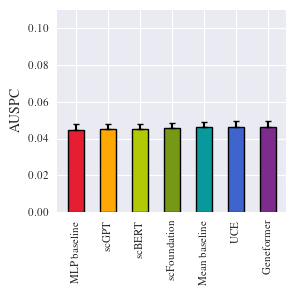

In [42]:
plt.figure(figsize=(3, 3))
table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_scf], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE', 'scFoundation'])
#table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE'])

table = pd.Series(table).sort_values()

yerr_values = [yerr[model] for model in table.index]

#cmap = load_cmap('Flourite')
cmap = load_cmap('Rainbow')
#cmap = load_cmap('RoseQuartz')
#cmap = load_cmap('Sardonyx')
# cmap = plt.cm.get_cmap('tab20b', len(table)) 

bar_colors = [cmap(i/6) for i in range(7)]
    
width = 0.5

yerr_top_only = ([0] * len(yerr_values), yerr_values)

# Add error bars to the bar plot
bars = plt.bar(table.index, table, width, color=bar_colors, 
               alpha=1.0, yerr=yerr_top_only, capsize=2, linewidth=1, edgecolor='black', 
               ecolor='black')

plt.ylabel('AUSPC')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.11)

ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('paper_figs/auspc_bar_1.pdf', dpi=300)
plt.show()

## MSE per split / AUSPC bar plot for all models

In [43]:
test_mse = find_mets_by_spectral_params('MLP gene expression', 'test/mse', df_mlp)
test_mse_uce = find_mets_by_spectral_params('uce', 'test/mse', df_uce)
test_mse_gf = find_mets_by_spectral_params('gf', 'test/mse', df_gf)
test_mse_scgpt = find_mets_by_spectral_params('scgpt', 'test/mse', df_scgpt)
test_mse_scbert = find_mets_by_spectral_params('scbert', 'test/mse', df_scbert)
test_mse_scf = find_mets_by_spectral_params('scfoundation', 'test/mse', df_scf)
test_mse_mean = find_mets_by_spectral_params('test_mean_norman', 'test/mse', df_mean)

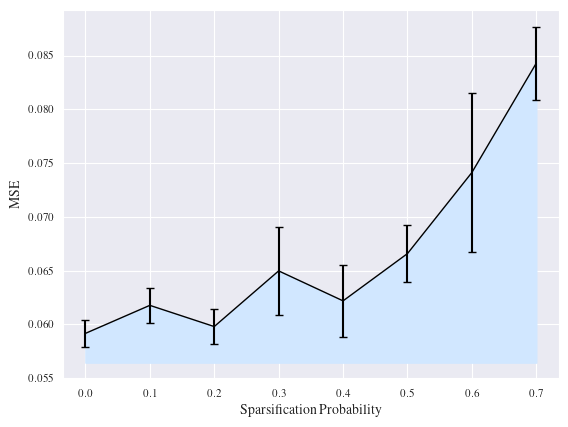

In [44]:
plot_spectral_curve(test_mse_mean, shading=True, errbar=True, plot_shading_c_same=False)
plt.savefig('paper_figs/full_spec_curve_mean.pdf', dpi=300)

## MSE bar plot for all models

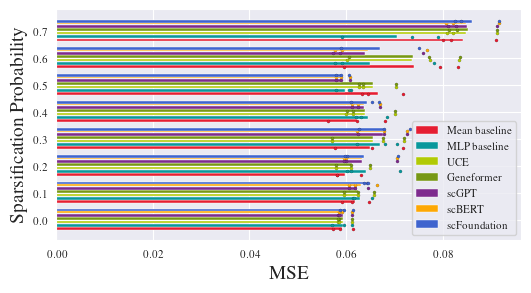

In [45]:
model_names = ['Mean baseline', 'MLP baseline', 'UCE', 'Geneformer', 'scGPT', 'scBERT', 'scFoundation']
model_mses = [test_mse_mean, test_mse, test_mse_uce, test_mse_gf, test_mse_scgpt, test_mse_scbert, test_mse_scf]

spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] 
x_labels = spectral_params
bars = []

dists_from_cent = [-1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.5]  
plt.figure(figsize=(6, 3))

assert len(dists_from_cent) == len(model_names)
pivot = np.arange(len(x_labels)) # pivot points for bars/ticks

# Use the custom dark blue colormap
#cmap = load_cmap('Flourite')
cmap = load_cmap('Rainbow')
#cmap = load_cmap('RoseQuartz')
#cmap = load_cmap('Sardonyx')
# cmap = plt.cm.get_cmap('tab20b', len(table)) 
bar_colors = [cmap(i/6) for i in range(7)]
width = 0.5

model_colors = {
    'MLP baseline': bar_colors[4],
    'Mean baseline': bar_colors[0],
    'scBERT': bar_colors[1],
    'UCE': bar_colors[2],
    'Geneformer': bar_colors[3],
    'scGPT': bar_colors[6],
    'scFoundation': bar_colors[5]
}

width = 0.1
for model, m_mse, dis_from_cent in zip(model_names, model_mses, dists_from_cent):
    c = model_colors[model]
    y = m_mse.mean()
    bar = [p + (dis_from_cent * width * 2.5) for p in pivot]
    bars.append(bar)
    plt.barh(bar, y, width, alpha=1.0,
    label=model,
    color=c,
    linewidth=0.3,  
    ecolor='black'
    )
    for rep in m_mse.iterrows():
        plt.scatter(rep[1], bar, color=c, edgecolors='black', linewidths=0.1, s=5)

plt.yticks(np.arange(8), spectral_params) #rotation='vertical')
plt.xlabel('MSE', fontsize=14)
plt.ylabel('Sparsification Probability', fontsize=14)
plt.legend(loc='lower right', fontsize=8)

#plt.savefig('paper_figs/bar_all_sp_mse.pdf', dpi=300)
plt.show()


In [46]:
size = formatter.line_width_plot(aspect_ratio="wide")
print(size)

(5.50107, 2.3576014285714284)


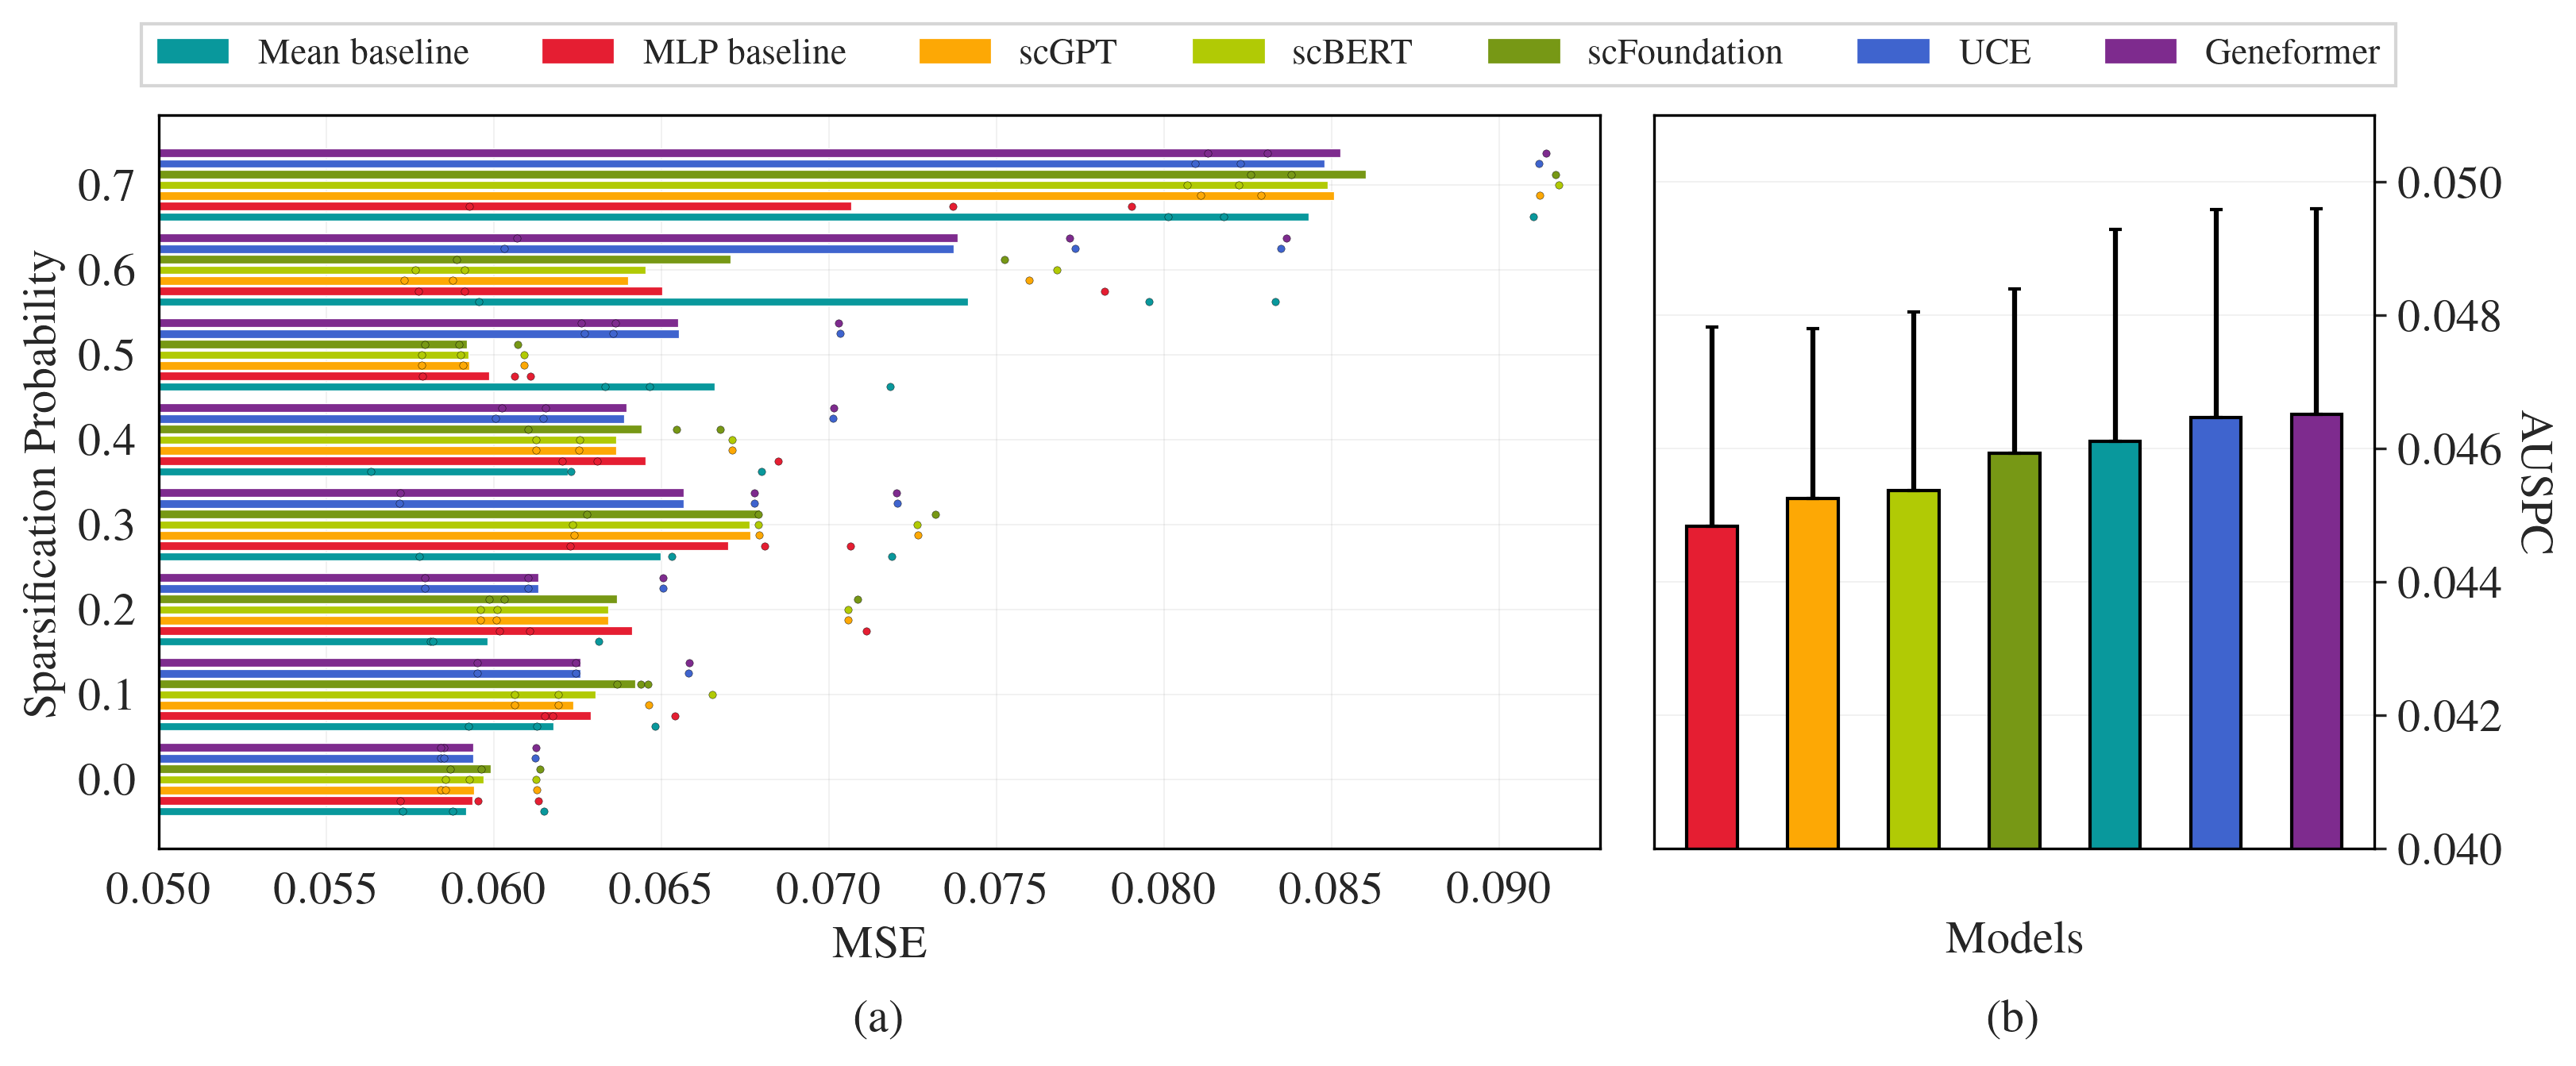

In [47]:
#sub pltos of the above
model_names = ['Mean baseline', 'MLP baseline', 'scGPT','scBERT', 'scFoundation', 'UCE', 'Geneformer']
model_mses = [test_mse_mean, test_mse, test_mse_scgpt, test_mse_scbert, test_mse_scf, test_mse_uce, test_mse_gf]

size = formatter

spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] 
x_labels = spectral_params


fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]}, dpi=300)  # 1x2 grid of subplots
plt.subplots_adjust(wspace=0.05)

cmap = load_cmap('Rainbow') 
bar_colors = [cmap(i/6) for i in range(7)]

model_colors = {    
    'Geneformer': bar_colors[6],
    'UCE': bar_colors[5],
    'Mean baseline': bar_colors[4],
    'scFoundation': bar_colors[3],
    'scBERT': bar_colors[2],
    'scGPT': bar_colors[1],
    'MLP baseline': bar_colors[0]
}

# Plot on the first subplot (a)
bars = []

dists_from_cent = [-1.5, -1.0, -0.5, 0,  0.5, 1.0, 1.5]  #for 5 modles needs to be manulaly set for anotehr n modles amount

assert len(dists_from_cent) == len(model_names)
pivot = np.arange(len(x_labels)) # pivot points for bars/ticks

width = 0.1
for model, m_mse, dis_from_cent in zip(model_names, model_mses, dists_from_cent):
    c = model_colors[model]
    y = m_mse.mean()
    bar = [p + (dis_from_cent * width * 2.5) for p in pivot]
    bars.append(bar)
    ax[0].barh(bar, y, width, alpha=1.0,
    label=model,
    color=c,
    linewidth=0.3,  
    ecolor='black'
    )
    for rep in m_mse.iterrows():
        ax[0].scatter(rep[1], bar, color=c, edgecolors='black', linewidths=0.1, s=5)

ax[0].set_yticks(np.arange(8), spectral_params, fontsize=14) #rotation='vertical')
ax[0].set_xlabel('MSE', fontsize=14)
ax[0].set_ylabel('Sparsification Probability', fontsize=14)
ax[0].set_xlim(0.05, 0.093)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_facecolor('white')
ax[0].grid(axis='both', color='grey', linestyle='solid', linewidth=0.05)
for spine in ax[0].spines.values():
    spine.set_color('black')

# # Plot on the second subplot (b)

table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_scf], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE', 'scFoundation'])

table = pd.Series(table).sort_values()

yerr_values = [yerr[model] for model in table.index]

cmap = load_cmap('Rainbow') 
    
width = 0.5

yerr_top_only = ([0] * len(yerr_values), yerr_values)

# Add error bars to the bar plot~
bars = ax[1].bar(table.index, table, width, color=bar_colors, 
               alpha=1.0, yerr=yerr_top_only, capsize=2, linewidth=1, edgecolor='black', 
               ecolor='black')

ax[1].set_ylabel('AUSPC', fontsize=14, rotation=-90, labelpad=15)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel('Models', fontsize=14, labelpad=22)
plt.xticks([])
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylim(0.04, 0.051)
ax[1].grid(color='grey', linewidth=0.05)
ax[1].set_facecolor('white')
for spine in ax[1].spines.values():
    spine.set_color('black')
lgd = ax[0].legend(loc='upper center', bbox_to_anchor=(0.77, 1.15), ncol=7, fancybox=False, shadow=False, fontsize=11, facecolor='white')
# plt.tight_layout(rect=[1, -1, 0, 0])

annotation_1 = ax[0].text(0.5, -0.25, '(a)', transform=ax[0].transAxes, ha='center', fontsize=14)
annotation_2 = ax[1].text(0.5, -0.25, '(b)', transform=ax[1].transAxes, ha='center', fontsize=14)

plt.savefig('paper_figs/bar_all_sp_mse_fig.pdf', bbox_extra_artists=(lgd, annotation_1, annotation_2,), bbox_inches='tight', dpi=300)

## Tables with MSE results

In [48]:
model_mses

[   test_mean_norman_0.0  test_mean_norman_0.1  test_mean_norman_0.2  \
 0              0.057263              0.059230              0.058104   
 1              0.061470              0.061275              0.058172   
 2              0.058753              0.064803              0.063119   
 
    test_mean_norman_0.3  test_mean_norman_0.4  test_mean_norman_0.5  \
 0              0.071861              0.067978              0.063303   
 1              0.057770              0.056305              0.064631   
 2              0.065290              0.062279              0.071820   
 
    test_mean_norman_0.6  test_mean_norman_0.7  
 0              0.059539              0.080102  
 1              0.083301              0.081777  
 2              0.079533              0.091005  ,
    MLP gene expression_0.0  MLP gene expression_0.1  MLP gene expression_0.2  \
 0                 0.061321                 0.061505                 0.071098   
 1                 0.057195                 0.061745         

In [49]:
all_mean = {}
all_sd = {}
for m_name, m_mses in zip(model_names, model_mses):
    m_ave_mse = m_mses.mean(axis=0)
    m_sd_mse = m_mses.std(axis=0)
    new_idx = pd.Index([idx.split('_')[-1] for idx in m_ave_mse.index])
    m_ave_mse.index = new_idx
    m_sd_mse.index = new_idx
    all_mean[m_name] = pd.DataFrame(m_ave_mse)
    all_sd[m_name] = pd.DataFrame(m_sd_mse)

all_mean_df = pd.concat(all_mean, axis=1)
all_sd_df = pd.concat(all_sd, axis=1)
all_mean_df.columns = model_names
all_sd_df.columns = model_names

In [50]:
# transpose all_sd_df
all_sd_df.T

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7
Mean baseline,0.002134,0.002819,0.002876,0.007051,0.005837,0.004582,0.012771,0.005871
MLP baseline,0.002068,0.002184,0.006077,0.004280,0.003448,0.001743,0.011444,0.010221
scGPT,0.001611,0.002044,0.006209,0.005130,0.003077,0.001541,0.010376,0.005401
scBERT,0.001399,0.003106,0.006204,0.005142,0.003070,0.001545,0.010653,0.006006
scFoundation,0.001351,0.000488,0.006221,0.005202,0.002998,0.001398,0.011547,0.004938
UCE,0.001600,0.003159,0.003563,0.007650,0.005441,0.004177,0.012003,0.005576
Geneformer,0.001619,0.003167,0.003564,0.007638,0.005383,0.004172,0.011838,0.005386


In [51]:
yerr

{'Mean baseline': 0.003171203390603614,
 'MLP baseline': 0.0029924290672882735,
 'scBERT': 0.002679268731571283,
 'scGPT': 0.002553842487360943,
 'Geneformer': 0.003086406005235603,
 'UCE': 0.0031153169450602613,
 'scFoundation': 0.0024640210233563596}

In [52]:
#'RdYlGn'
all_mean_df.style.background_gradient(cmap='RdYlGn_r', axis=1)

,Mean baseline,MLP baseline,scGPT,scBERT,scFoundation,UCE,Geneformer
0.0,0.059162,0.059345,0.059401,0.059680,0.059887,0.059371,0.059382
0.1,0.061770,0.062884,0.062369,0.063010,0.064205,0.062576,0.062574
0.2,0.059798,0.064101,0.063404,0.063407,0.063659,0.061320,0.061317
0.3,0.064974,0.066985,0.067647,0.067613,0.067927,0.065654,0.065652
0.4,0.062187,0.064525,0.063630,0.063633,0.064396,0.063870,0.063953
0.5,0.066585,0.059841,0.059255,0.059239,0.059193,0.065514,0.065496
0.6,0.074125,0.065018,0.064004,0.064507,0.067052,0.073704,0.073822
0.7,0.084295,0.070655,0.085057,0.084881,0.086005,0.084787,0.085245


In [25]:
all_mean_df

,MLP baseline,scGPT,scBERT,scFoundation,Mean baseline,UCE,Geneformer
0.0,0.059162,0.059345,0.059371,0.059382,0.059401,0.059680,0.059887
0.1,0.061770,0.062884,0.062576,0.062574,0.062369,0.063010,0.064205
0.2,0.059798,0.064101,0.061320,0.061317,0.063404,0.063407,0.063659
0.3,0.064974,0.066985,0.065654,0.065652,0.067647,0.067613,0.067927
0.4,0.062187,0.064525,0.063870,0.063953,0.063630,0.063633,0.064396
0.5,0.066585,0.059841,0.065514,0.065496,0.059255,0.059239,0.059193
0.6,0.074125,0.065018,0.073704,0.073822,0.064004,0.064507,0.067052
0.7,0.084295,0.066474,0.084787,0.085245,0.085057,0.084881,0.086005
